In [1]:
%pwd

u'/Users/christophereppig/DSI-CHI-1'

In [113]:
from imdbpie import Imdb
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import csv
from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
import seaborn as sbn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import Ridge, Lasso
from sklearn.grid_search import GridSearchCV
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
%matplotlib inline

#### I moved the csv import here to make the rest of the notebook have better organization, even though this csv isn't created until later in the notebook.

In [11]:
movies = pd.read_csv('~/Datasets/movies.csv')

## I downloaded all of my data in another notebook. Here is the code I used:

### Acquiring data:

In [3]:
# imdb = Imdb()
# top = imdb.top_250()

In [4]:
# year_temp = []
# title_temp = []
# rating_temp = []
# tconst_temp = []
# type_temp = []

# for i in top:
#     title_temp.append(i['title'])
#     year_temp.append(i['year'])
#     rating_temp.append(i['rating'])
#     tconst_temp.append(i['tconst'])
#     type_temp.append(i['type'])    
    
# titles = {"titles":title_temp}
# years = {"year":year_temp}
# ratings = {"ratings":rating_temp}
# types = {"type":type_temp}
# tconst = {'tconst' : tconst_temp}


# topdf['rating'] = pd.DataFrame(ratings)
# topdf['titles'] = pd.DataFrame(titles)
# topdf['year'] = pd.DataFrame(years)
# topdf['tconst'] = pd.DataFrame(tconst)
# topdf['type'] = pd.DataFrame(types)

In [5]:
# topdf = pd.DataFrame(titles)

### In addition to the IMDB top 250, I added another 251 movies for comparison

In [6]:
# titles = ['Code Name: K.O.Z.', "Laser Mission", 'Saving Christmas', "Ultraviolet",
# 'Superbabies: Baby Geniuses 2', 'Daniel the Wizard', 'Manos: Hands of Fate',
# 'Pledge This!', 'Turks in Space', 'Birdemic: Shock and Terror', 'Titanic: The Legend Goes On...',
# 'Dream.net', 'Zombie Nation', 'Disaster Movie',
# 'Foodfight!', 'The Hottie & the Nottie', "A Fox's Tale", "Ram Gopal Varma's Indian Flames",
# "Keloglan vs. the Black Prince", "Ben & Arthur", "Going Overboard", "Yes Sir", "Attack of the Jurassic Shark",
# "The Legend of the Titanic", "Kartoffelsalat", "House of the Dead",
# "Himmatwala", "Who's Your Caddy?", "Birdemic 2: The Resurrection", "Hobgoblins",
# "Son of the Mask", "Crossover", "Doublegangers", "Space Mutiny",
# "Night Train to Mundo Fine", "Extra Terrestrial Visitors", "The Wild World of Batwoman", 
# "Surf School", "Dracula 3000", "Epic Movie", "Alone in the Dark", "Final Justice", 
# "The Starfighters", "Die Hard Dracula", "Too Beautiful", "Anne B. Real", "The Pumaman", 
# "Track of the Moon Beast", "Battlefield Earth", "Girl in Gold Boots", "United Passions", 
# "Invasion of the Neptune Men", 
# "Dark Harvest II: The Maize", "Chairman of the Board", "The Skydivers", "The Class", "Lawnmower Man 2: Beyond Cyberspace", 
# "Baby Geniuses", "Kyaa Kool Hain Hum 3", "The Oogieloves in the Big Balloon Adventure", 
# "The Touch of Satan", "The Blade Master", "Soultaker", "Prince of Space", "Simon Sez", "Tees Maar Khan",
# "Santa with Muscles", "Zombie Nightmare", "Boggy Creek II: And the Legend Continues", "Car 54, Where Are You?", "A Story About Love", 
# "Fat Slags", "Santa Claus", "Breaking Wind", "Mitchell", "Body in the Web", "Ed", "The Aztec Mummy Against the Humanoid Robot",
# "Laserblast", "Dragonball: Evolution", "Meet the Spartans", "I Accuse My Parents", "Devil Fish", "Survival Island", 
# "Theodore Rex", "Time Chasers", "It's Pat", "Warrior of the Lost World", "Troll 2", "The Bat People", "Date Movie", 
# "Ghosts Can't Do It", "The 13th Warrior", "47 Ronin", "The Adventures of Baron Munchausen", "The Adventures of Pluto Nash",
# "The Adventures of Rocky & Bullwinkle", "The Alamo", "Alexander", "Ali", "Aloha", "Around the World in 80 Days", 
# "The Astronaut's Wife", "Ballistic: Ecks vs. Sever", "Battlefield Earth", "Battleship", "Beloved", "Blackhat", 
# "The Bonfire of the Vanities", "Catwoman", "Chill Factor", "The Chronicles of Riddick", "Conan the Barbarian", 
# "The Cotton Club", "Cowboys & Aliens", "Cutthroat Island", "Doctor Dolittle", "Driven", "Dudley Do-Right", 
# "Ender's Game", "Evan Almighty", "The Fall of the Roman Empire", "Fantastic Four", "Fathers' Day", "Final Fantasy: The Spirits Within",
# "The Finest Hours", "Gods and Generals", "Gods of Egypt", "The Good Dinosaur", "The Great Raid", "Green Lantern", 
# "Happy Feet Two", "Hard Rain", "Hart's War", "Hello, Dolly!", "Honky Tonk Freeway", "How Do You Know", 
# "Hudson Hawk", "Hugo", "Instinct", "The Invasion", "Ishtar", "Jack Frost", "Jack the Giant Slayer", "John Carter", 
# "Jupiter Ascending", "K-19: The Widowmaker", "Krull", "Land of the Lost", "The Last Castle", "Legends of Oz: Dorothy's Return", 
# "Lolita", "The Lone Ranger", "The Lovely Bones", "Lucky You", "The Man from U.N.C.L.E.", "Mars Needs Moms", "Monkeybone", 
# "Mr. Peabody & Sherman", "Nine", "The Nutcracker in 3D", "One from the Heart", "Osmosis Jones", "Pan", "Peter Pan", 
# "Pixels", "Poseidon", "The Postman", "R.I.P.D.", "Red Planet", "Revolution", "Rise of the Guardians", "Rollerball", 
# "Rush Hour 3", "Sahara", "Seventh Son", "Soldier", "A Sound of Thunder", "Speed Racer", "Sphere", "Stealth", "Supernova", 
# "Titan A.E.", "Tomorrowland", "Town & Country", "Treasure Planet", "Windtalkers", "The Wolfman", "xXx: State of the Union", 
# "Zoom", "Reefer Madness", "No Orchids for Miss Blandish", "The Babe Ruth Story", "Glen or Glenda", "Robot Monster", 
# "Bride of the Monster", "The Conqueror", "Fire Maidens from Outer Space ", "Plan 9 from Outer Space", "The Beast of Yucca Flats", 
# "Eegah", "The Creeping Terror", "The Horror of Party Beach", "The Incredibly Strange Creatures", "Santa Claus Conquers the Martians", 
# "Monster a Go-Go!", "A Place for Lovers", "Myra Breckinridge", "Zabriskie Point", "Zaat", "An American Hippie in Israel", "At Long Last Love", 
# "Exorcist II: The Heretic", "The Swarm", "I Spit on Your Grave", "Caligula", "Heaven's Gate", "The Apple", "Inchon", 
# "Tarzan, the Ape Man", "Mommie Dearest", "Howard the Duck", "Superman IV: The Quest for Peace", "The Garbage Pail Kids Movie", 
# "Leonard Part 6", "Mac and Me", "Things", "Highlander 2: The Quickening", "Intensive Care", "Frozen Assets", "North", 
# "Showgirls", "Striptease", "Batman & Robin", "The Avengers", "Parting Shots", "The Underground Comedy Movie", 
# "Battlefield Earth", "Honest", "Rancid Aluminium", "Freddy Got Fingered", "Glitter", "The Master of Disguise", 
# "From Justin to Kelly", "The Room", "Gigli", "Sex Lives of the Potato Men", "Alone in the Dark", "The Last Airbender", 
# "Jack and Jill", "That's My Boy", "Run for Your Wife", "Movie 43"
# ]

In [7]:
# tconsts = []
# for i in titles:
#     tconsts.append(imdb.search_for_title(i)[0]['imdb_id'])
    
# titledic = {'title' : titles}
# tconstdic = {'tconst': tconsts}

# bottom_100 = pd.DataFrame(tconstdic)
# bottom_100['title'] = pd.DataFrame(titledic)
# bottom_100.columns = ['tconst', 'titles']
# movies = pd.concat([topdf, bottom_100])

### Adding additional features with IMDBpie

In [8]:
# movies['genres'] = movies['tconst'].apply(lambda x: imdb.get_title_by_id(x).genres)
# movies['runtime'] = movies['tconst'].apply(lambda x: imdb.get_title_by_id(x).runtime)
# movies['certification'] = movies['tconst'].apply(lambda x: imdb.get_title_by_id(x).certification)
# movies['plot'] = movies['tconst'].apply(lambda x: imdb.get_title_by_id(x).plots)
# movies['year'] = movies['tconst'].apply(lambda x: imdb.get_title_by_id(x).year)
# movies['tagline'] = movies['tconst'].apply(lambda x: imdb.get_title_by_id(x).tagline)
# movies['rating'] = movies['tconst'].apply(lambda x: imdb.get_title_by_id(x).rating)
# movies['type'] = movies['tconst'].apply(lambda x: imdb.get_title_by_id(x).type)

### Adding additional features by transformation

In [9]:
# movies['ngenres'] = movies['genres'].apply(len)

# movies['isCrime'] = movies['genres'].apply(lambda x: 1 if 'Crime' in x else 0)

# genre_classes = ["Romance", "Thriller", "History", "Biography", "Adventure", "Fantasy", "Western", 
#                 "Sci-Fi", "Family", "War", "Animation", "Horror", "Sport", "Mystery", "Music", 
#                 "Drama", "Comedy", "Action"]
# for i in genre_classes:
#     movies['is'+i] = movies['genres'].apply(lambda x: 1 if i in x else 0)
    

# movies['isGood'] = movies['rating'].apply(lambda x: 1 if x >= 8 else 0)

In [27]:
movies['R'] = movies['certification'].apply(lambda x: 1 if x == "R" else 0)
movies['PG-13'] = movies['certification'].apply(lambda x: 1 if x == "PG-13" else 0)
movies['PG'] = movies['certification'].apply(lambda x: 1 if x == "PG" else 0)
movies['G'] = movies['certification'].apply(lambda x: 1 if x == "G" else 0)

### Exported data as .csv

In [10]:
# movies.to_csv("~/Datasets/movies.csv", encoding='utf-8')

## Exploratory Analysis

In [12]:
movies.head()

,Unnamed: 0,genres,rating,tconst,titles,type,year,runtime,certification,plot,...,isWar,isAnimation,isHorror,isSport,isMystery,isMusic,isDrama,isComedy,isAction,isGood
0,0,"[Crime, Drama]",9.3,tt0111161,The Shawshank Redemption,feature,1994,8520.0,R,[Chronicles the experiences of a formerly succ...,...,0,0,0,0,0,0,1,0,0,1
1,1,"[Crime, Drama]",9.2,tt0068646,The Godfather,feature,1972,10500.0,R,[When the aging head of a famous crime family ...,...,0,0,0,0,0,0,1,0,0,1
2,2,"[Crime, Drama]",9.0,tt0071562,The Godfather: Part II,feature,1974,12120.0,R,[The continuing saga of the Corleone crime fam...,...,0,0,0,0,0,0,1,0,0,1
3,3,"[Action, Crime, Drama, Thriller]",9.0,tt0468569,The Dark Knight,feature,2008,9120.0,PG-13,[Set within a year after the events of Batman ...,...,0,0,0,0,0,0,1,0,1,1
4,4,"[Crime, Drama]",8.9,tt0050083,12 Angry Men,feature,1957,5760.0,Approved,[The defense and the prosecution have rested a...,...,0,0,0,0,0,0,1,0,0,1


In [13]:
movies['type'].value_counts()

feature    501
Name: type, dtype: int64

In [30]:
movies.columns

Index([u'Unnamed: 0', u'genres', u'rating', u'tconst', u'titles', u'type',
       u'year', u'runtime', u'certification', u'plot', u'tagline', u'ngenres',
       u'isCrime', u'isRomance', u'isThriller', u'isHistory', u'isBiography',
       u'isAdventure', u'isFantasy', u'isWestern', u'isSci-Fi', u'isFamily',
       u'isWar', u'isAnimation', u'isHorror', u'isSport', u'isMystery',
       u'isMusic', u'isDrama', u'isComedy', u'isAction', u'isGood', u'R',
       u'PG-13', u'PG', u'G'],
      dtype='object')

In [15]:
movies['rating'].describe()

count    501.000000
mean       6.308782
std        2.433212
min        1.200000
25%        4.300000
50%        8.000000
75%        8.300000
max        9.300000
Name: rating, dtype: float64

In [16]:
movies['certification'].value_counts()

R            160
PG-13         92
PG            87
Not Rated     33
Approved      29
Unrated       18
G             15
TV-PG         13
TV-14          7
Passed         7
TV-MA          6
M              3
13             3
12             3
TV-G           1
12A            1
M18            1
(Banned)       1
15             1
15PG           1
16             1
18             1
NC-17          1
M/6            1
M/16           1
14A            1
E              1
Name: certification, dtype: int64

In [185]:
genres = ['isCrime', u'isRomance', u'isThriller', u'isHistory', u'isBiography',
       u'isAdventure', u'isFantasy', u'isWestern', u'isSci-Fi', u'isFamily',
       u'isWar', u'isAnimation', u'isHorror', u'isSport', u'isMystery',
       u'isMusic', u'isDrama', u'isComedy', u'isAction']
for i in genres:
    print i, '\n', movies[i].value_counts(), "\n"

isCrime 
0    419
1     82
Name: isCrime, dtype: int64 

isRomance 
0    445
1     56
Name: isRomance, dtype: int64 

isThriller 
0    394
1    107
Name: isThriller, dtype: int64 

isHistory 
0    475
1     26
Name: isHistory, dtype: int64 

isBiography 
0    468
1     33
Name: isBiography, dtype: int64 

isAdventure 
0    359
1    142
Name: isAdventure, dtype: int64 

isFantasy 
0    418
1     83
Name: isFantasy, dtype: int64 

isWestern 
0    487
1     14
Name: isWestern, dtype: int64 

isSci-Fi 
0    398
1    103
Name: isSci-Fi, dtype: int64 

isFamily 
0    438
1     63
Name: isFamily, dtype: int64 

isWar 
0    462
1     39
Name: isWar, dtype: int64 

isAnimation 
0    463
1     38
Name: isAnimation, dtype: int64 

isHorror 
0    458
1     43
Name: isHorror, dtype: int64 

isSport 
0    482
1     19
Name: isSport, dtype: int64 

isMystery 
0    459
1     42
Name: isMystery, dtype: int64 

isMusic 
0    492
1      9
Name: isMusic, dtype: int64 

isDrama 
0    253
1    248
Name: isD

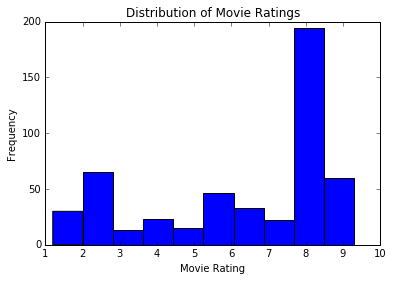

In [18]:
plt.hist(movies['rating'])
plt.title("Distribution of Movie Ratings")
plt.xlabel("Movie Rating")
plt.ylabel("Frequency")

In [19]:
movies['isGood'].value_counts()

1    251
0    250
Name: isGood, dtype: int64

In [158]:
movies['year'].describe()

count     501.000000
mean     1989.682635
std        21.863693
min      1921.000000
25%      1977.000000
50%      1998.000000
75%      2006.000000
max      2016.000000
Name: year, dtype: float64

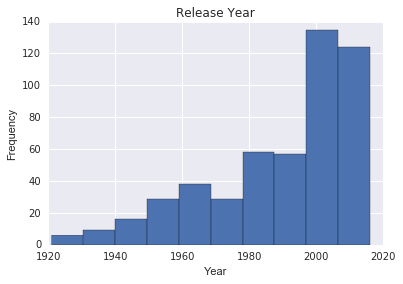

In [160]:
plt.hist(movies['year'])
plt.title("Release Year")
plt.xlabel("Year")
plt.ylabel("Frequency")

In [31]:
movies['ngenres'].value_counts()

3    166
2    125
4     96
1     69
5     36
6      7
7      2
Name: ngenres, dtype: int64

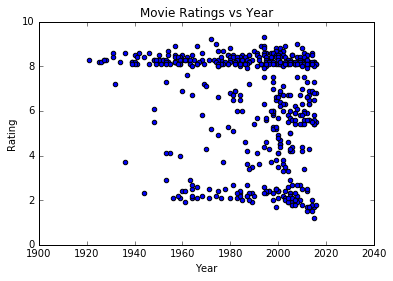

In [74]:
plt.scatter(movies['year'], movies['rating'])
plt.title("Movie Ratings vs Year")
plt.xlabel("Year")
plt.ylabel("Rating")

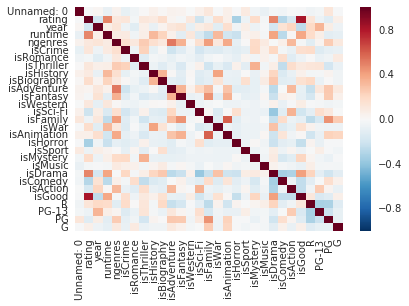

In [83]:
sbn.heatmap(movies.corr())

### Adding additional features

In [29]:
movies.head()

,Unnamed: 0,genres,rating,tconst,titles,type,year,runtime,certification,plot,...,isMystery,isMusic,isDrama,isComedy,isAction,isGood,R,PG-13,PG,G
0,0,"[Crime, Drama]",9.3,tt0111161,The Shawshank Redemption,feature,1994,8520.0,R,[Chronicles the experiences of a formerly succ...,...,0,0,1,0,0,1,1,0,0,0
1,1,"[Crime, Drama]",9.2,tt0068646,The Godfather,feature,1972,10500.0,R,[When the aging head of a famous crime family ...,...,0,0,1,0,0,1,1,0,0,0
2,2,"[Crime, Drama]",9.0,tt0071562,The Godfather: Part II,feature,1974,12120.0,R,[The continuing saga of the Corleone crime fam...,...,0,0,1,0,0,1,1,0,0,0
3,3,"[Action, Crime, Drama, Thriller]",9.0,tt0468569,The Dark Knight,feature,2008,9120.0,PG-13,[Set within a year after the events of Batman ...,...,0,0,1,0,1,1,0,1,0,0
4,4,"[Crime, Drama]",8.9,tt0050083,12 Angry Men,feature,1957,5760.0,Approved,[The defense and the prosecution have rested a...,...,0,0,1,0,0,1,0,0,0,0


# Modeling

In [34]:
movies.columns

Index([u'Unnamed: 0', u'genres', u'rating', u'tconst', u'titles', u'type',
       u'year', u'runtime', u'certification', u'plot', u'tagline', u'ngenres',
       u'isCrime', u'isRomance', u'isThriller', u'isHistory', u'isBiography',
       u'isAdventure', u'isFantasy', u'isWestern', u'isSci-Fi', u'isFamily',
       u'isWar', u'isAnimation', u'isHorror', u'isSport', u'isMystery',
       u'isMusic', u'isDrama', u'isComedy', u'isAction', u'isGood', u'R',
       u'PG-13', u'PG', u'G'],
      dtype='object')

In [51]:
movies_nona = movies.dropna()

In [52]:
y = movies_nona['isGood']
x = movies_nona[[
       u'year', u'runtime', u'ngenres',
       u'isCrime', u'isRomance', u'isThriller', u'isHistory', u'isBiography',
       u'isAdventure', u'isFantasy', u'isWestern', u'isSci-Fi', u'isFamily',
       u'isWar', u'isAnimation', u'isHorror', u'isSport', u'isMystery',
       u'isMusic', u'isDrama', u'isComedy', u'isAction', u'R',
       u'PG-13', u'PG', u'G']]

In [161]:
len(x.columns)

26

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [100]:
xy = [x_train, x_test, y_train, y_test]
for i in xy:
    print i.shape

(328, 26)
(110, 26)
(328,)
(110,)


In [99]:
x_train.shape

(328, 26)

In [90]:
model1 = RandomForestClassifier()

In [166]:
parameters = {
    "n_estimators" : [10, 25, 50, 100, 500],
    "max_depth" : [2,3,5,7,10, None],
    "max_features" : [0.25, 0.5, 0.75, 1.0]
}

In [167]:
gridsearch = GridSearchCV(model1, param_grid=parameters, cv=7, n_jobs=-1)

In [168]:
gridsearch

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 25, 50, 100, 500], 'max_features': [0.25, 0.5, 0.75, 1.0], 'max_depth': [2, 3, 5, 7, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [169]:
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 25, 50, 100, 500], 'max_features': [0.25, 0.5, 0.75, 1.0], 'max_depth': [2, 3, 5, 7, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [170]:
gridsearch.best_estimator_.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.25, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [171]:
gridsearch.best_estimator_.score(x_train, y_train)

1.0

In [172]:
gridsearch.best_estimator_.score(x_test, y_test)

0.72727272727272729

In [173]:
predictions = gridsearch.best_estimator_.predict(x_test)

In [174]:
confusion_matrix(y_test, predictions)

array([[38, 18],
       [12, 42]])

In [175]:
print classification_report(y_test, predictions)

             precision    recall  f1-score   support

          0       0.76      0.68      0.72        56
          1       0.70      0.78      0.74        54

avg / total       0.73      0.73      0.73       110



## Feature Importance

In [186]:
bestforest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [187]:
bestforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [188]:
from sklearn import tree
i_tree = 0
for tree_in_forest in bestforest.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
    i_tree = i_tree + 1

In [189]:
feature_importances = pd.DataFrame(bestforest.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(10)

,importance
runtime,0.225788
year,0.156599
isDrama,0.132786
ngenres,0.055640
isAction,0.055151
isHorror,0.048464
isComedy,0.038770
isMystery,0.033517
isSci-Fi,0.025799
PG-13,0.018002


In [190]:
%pwd

u'/Users/christophereppig/DSI-CHI-1'

## Blog post:

http://myadventuresindata.blogspot.com/2016/11/predicting-movie-quality.html